**Part 1 – Data Wrangling and Transformation**

**Data Inspection**

In [4]:
library(tidyverse)

data("mpg")
class(mpg)
head(mpg)

slice_head(mpg, n = 6)

[1] "tbl_df"     "tbl"        "data.frame"

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


**Data Wrangling and Transformation**

In [6]:
mpg_sep <- mpg %>%
  separate(
    trans,
    into = c("transmission_type", "num_gears"),
    sep = "\\("
  ) %>%
  mutate(
    num_gears = str_remove(num_gears, "\\)")
  )

  mpg_transformed <- mpg_sep %>%
  mutate(
    log_hwy = log(hwy),
    sqrt_displ = sqrt(displ)
  )

  head(mpg_transformed)

manufacturer,model,displ,year,cyl,transmission_type,num_gears,drv,cty,hwy,fl,class,log_hwy,sqrt_displ
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
audi,a4,1.8,1999,4,auto,l5,f,18,29,p,compact,3.367296,1.341641
audi,a4,1.8,1999,4,manual,m5,f,21,29,p,compact,3.367296,1.341641
audi,a4,2.0,2008,4,manual,m6,f,20,31,p,compact,3.433987,1.414214
audi,a4,2.0,2008,4,auto,av,f,21,30,p,compact,3.401197,1.414214
audi,a4,2.8,1999,6,auto,l5,f,16,26,p,compact,3.258097,1.673320
audi,a4,2.8,1999,6,manual,m5,f,18,26,p,compact,3.258097,1.673320


**Part 2 – Visualization and Interpretation**

**Histogram of the original fuel efficiency variable**

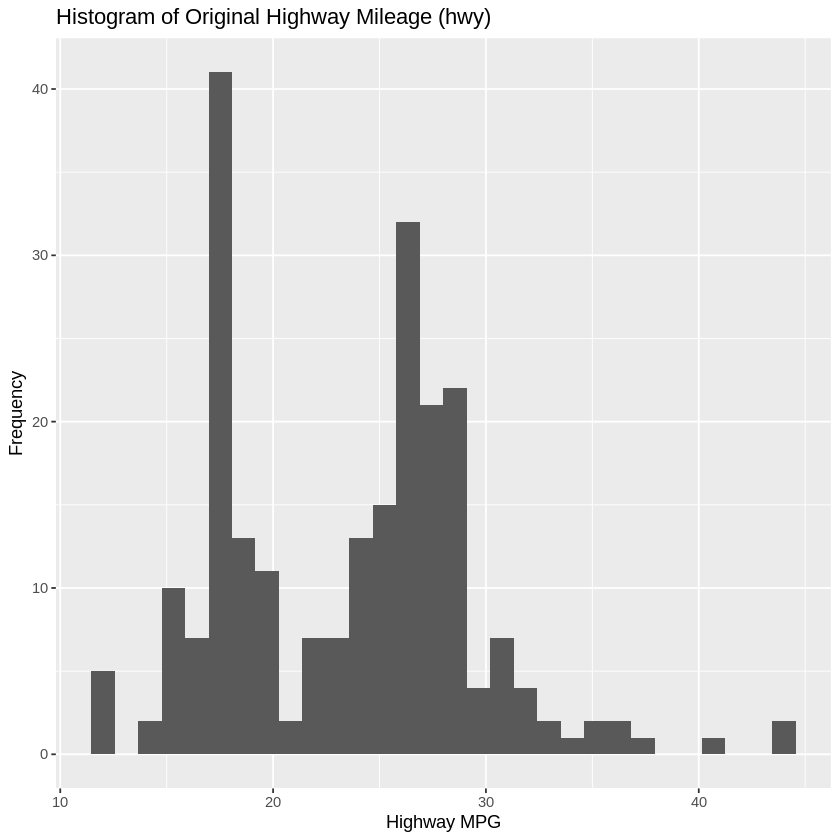

In [8]:
library(tidyverse)

ggplot(mpg_transformed, aes(x = hwy)) +
  geom_histogram(bins = 30) +
  labs(
    title = "Histogram of Original Highway Mileage (hwy)",
    x = "Highway MPG",
    y = "Frequency"
  )

**Histogram of the transformed fuel efficiency variable**

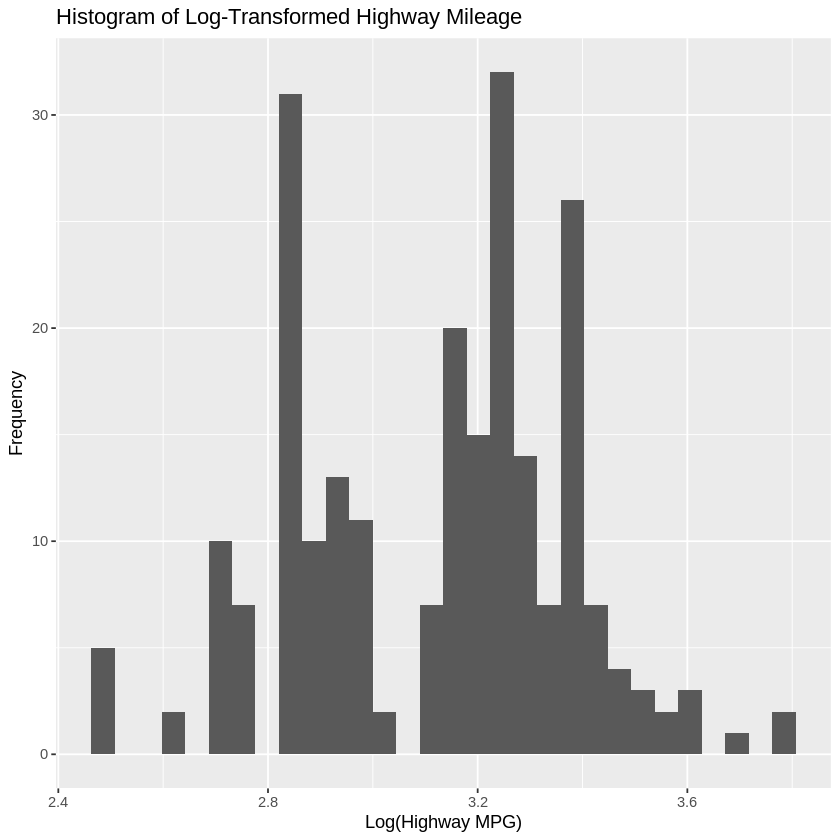

In [9]:
ggplot(mpg_transformed, aes(x = log_hwy)) +
  geom_histogram(bins = 30) +
  labs(
    title = "Histogram of Log-Transformed Highway Mileage",
    x = "Log(Highway MPG)",
    y = "Frequency"
  )

**Q–Q plot for original variable**

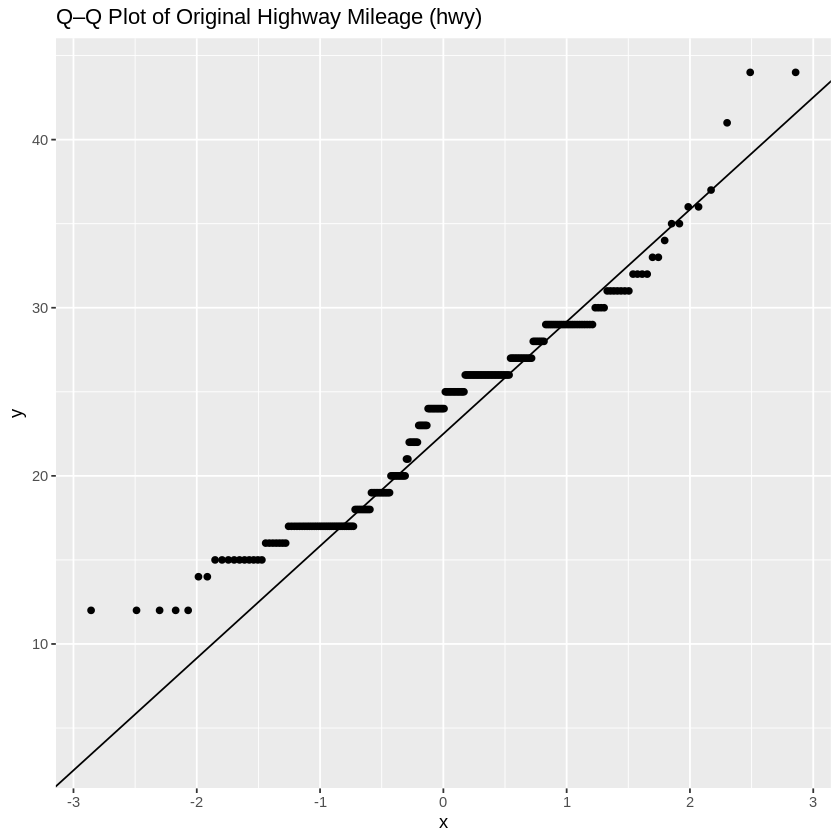

In [10]:
ggplot(mpg_transformed, aes(sample = hwy)) +
  stat_qq() +
  stat_qq_line() +
  labs(
    title = "Q–Q Plot of Original Highway Mileage (hwy)"
  )

**Q–Q plot for transformed variable**

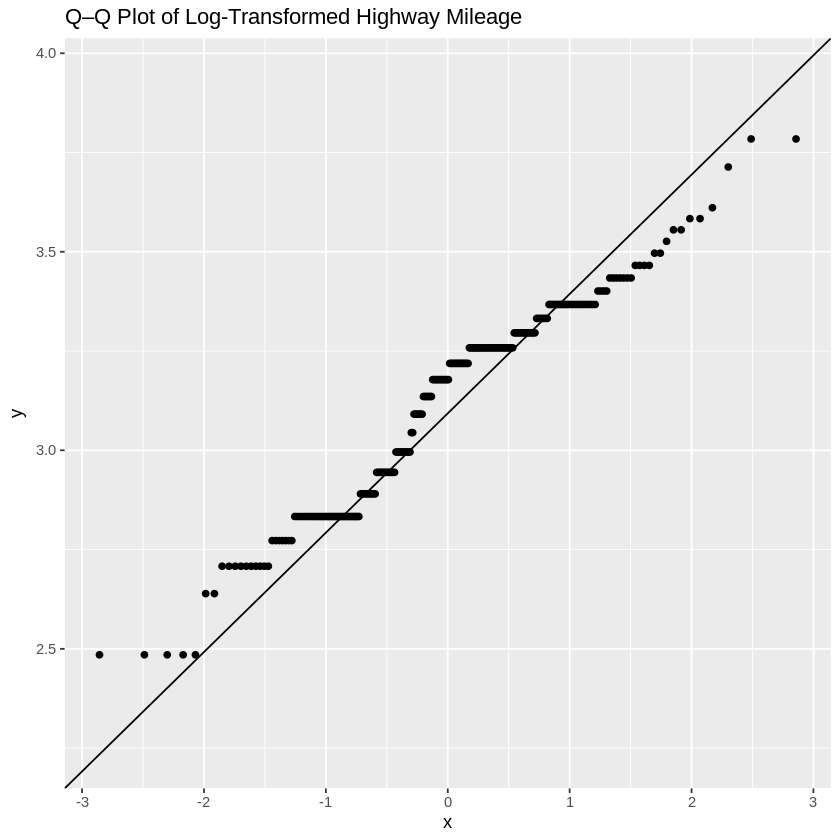

In [11]:
ggplot(mpg_transformed, aes(sample = log_hwy)) +
  stat_qq() +
  stat_qq_line() +
  labs(
    title = "Q–Q Plot of Log-Transformed Highway Mileage"
  )

**Interpretation**

The histogram of the original highway mileage (hwy) shows a right-skewed distribution, indicating that most cars have moderate fuel efficiency with fewer cars achieving very high mileage. After applying a log transformation, the distribution becomes more symmetric. The Q–Q plot of the transformed variable aligns more closely with the reference line compared to the original, suggesting that the log transformation improves normality.

**Reflection**

I chose a log transformation for highway fuel efficiency because the original data was right-skewed, and the log transformation helps reduce skewness and stabilize variance. I also applied a square root transformation to engine displacement to lessen the impact of extreme values while keeping the original scale interpretable. After transformation, the distribution of highway mileage appeared more symmetric, and the Q–Q plot showed closer alignment to the normal reference line, indicating improved normality. These improvements are important for future statistical modeling because many regression techniques assume normality and constant variance, which can lead to more reliable estimates and better model performance.